In [257]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from salishsea_tools import nc_tools, viz_tools

%matplotlib inline
mpl.rcParams.update({'font.size': 12})

In [258]:
def surface_currents(u_vel, v_vel):
    ''' Plot surface currents from southern Gulf Islands to Howe Sound
    '''
    
    # Define nc subfields
    ugrid = u_vel.variables['vozocrtx']
    vgrid = v_vel.variables['vomecrty']
    zlevels = u_vel.variables['depthu']
    timesteps = u_vel.variables['time_counter']
    
    # Load grid to retrieve map coords
    grid = nc.Dataset('../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    lats = grid.variables['nav_lat']
    lons = grid.variables['nav_lon']
    
    # Make figure
    fig, (axl, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Define the v velocity component slice to plot
    t, zmax, ylocn = 0, 41, 500
    section_slice = np.arange(208, 293)

    # Slice and mask the v array
    vgrid_tzyx = np.ma.masked_values(vgrid[t, :zmax, ylocn, section_slice], 0)

    # Plot the v velocity colour mesh
    cmap = plt.get_cmap('bwr')
    cmap.set_bad('black')
    mesh = axl.pcolormesh(section_slice[:], zlevels[:zmax], vgrid_tzyx, cmap=cmap, vmin=-0.1, vmax=0.1)
    axl.invert_yaxis()
    cbar = fig.colorbar(mesh, ax=axl)
    cbar.set_label('v Velocity [{.units}]'.format(vgrid))

    # Axes labels and title
    axl.set_xlabel('x Index')
    axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))

    # Axes limits and grid
    axl.set_xlim(section_slice[1], section_slice[-1])
    axl.set_ylim(zlevels[zmax - 2] + 10, 0)
    axl.set_axis_bgcolor('black')
    axl.grid()
    
    # Slicing parameters
    vel_grid = lons.shape
    t, zlevel = 0, 0
    y_slice = np.arange(vel_grid[0])
    x_slice = np.arange(vel_grid[1])
    lats_slice = lats[0:vel_grid[0], 0:vel_grid[1]]
    lons_slice = lons[0:vel_grid[0], 0:vel_grid[1]]
    
    # Slice u, v and unstagger
    ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
    vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
    u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
    
    # Transform velocities from grid to map coords
    theta_rad = 29 * np.pi / 180
    u_E = u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
    v_N = u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)
    
    # Make figure
    viz_tools.set_aspect(ax2)
    ax2.quiver(lons_slice[1::5, 1::5], lats_slice[1::5, 1::5], u_E[::5,::5], v_N[::5,::5], scale=3)
    viz_tools.plot_land_mask(ax2, grid, coords='map', color='k')
    ax2.set_xlim([-124, -123])
    ax2.set_ylim([48.5, 49.7])
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    ax2.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


/home/bmoorema/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


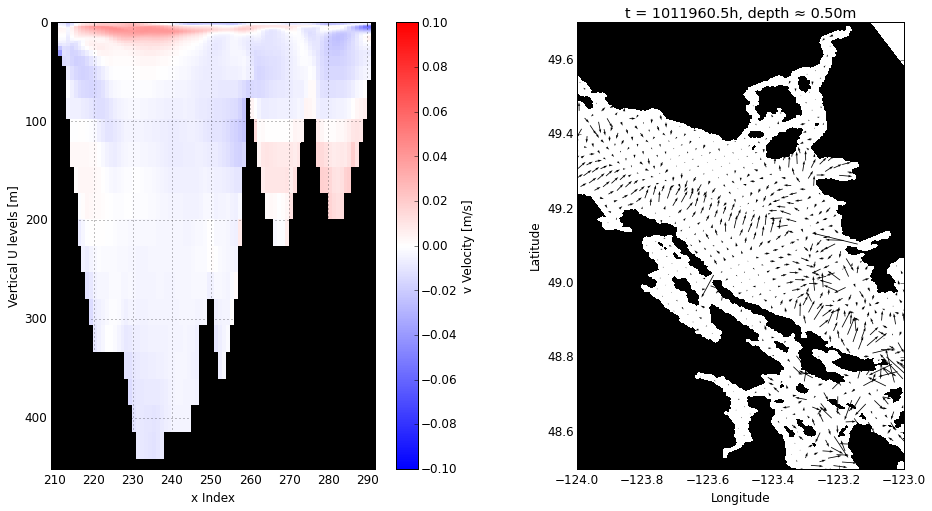

In [259]:
# Load results U.nc and V.nc
u_vel = nc.Dataset('/ocean/dlatorne/MEOPAR/SalishSea/results/salishsea-tutorial/happy-place/SalishSea_1h_20150612_20150612_grid_U.nc')
v_vel = nc.Dataset('/ocean/dlatorne/MEOPAR/SalishSea/results/salishsea-tutorial/happy-place/SalishSea_1h_20150612_20150612_grid_V.nc')

surface_currents(u_vel, v_vel)